In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from a6_utils import *

# Exercise 3

### a

In [104]:
data = np.loadtxt("data/points.txt")
n = len(data)
mi = 1/n * np.cumsum(data, 0)[-1]
Xd = np.zeros(data.shape)
Xd[:,0] = data[:, 0] - mi[0]
Xd[:,1] = data[:, 1] - mi[1]
C = 1/(n-1) * np.matmul(Xd, Xd.T)
U, D, VT = np.linalg.svd(C)
D[D < 10**(-10)] = 0
newD = 1 / ((np.eye(D.shape[0], D.shape[0]) * D) * (n-1) + 10**(-20))
newD[newD == 10**20] = 0
U = np.matmul(Xd.T, np.matmul(U, newD))[0:2,0:2]
ee1 = U[:,0]
ee1 /= np.sqrt(np.sum(ee1*ee1))
ee2 = U[:,1]
ee2 /= np.sqrt(np.sum(ee2*ee2))
# print(ee1)
# print(ee2)
U[:, 0] = ee1
U[:, 1] = ee2
print(U)

e1 = np.zeros((2,2))
e1[0,:] = mi
e1[1,:] = mi + ee1 * np.sqrt(D[0])
e2 = np.zeros((2,2))
e2[0,:] = mi
e2[1,:] = mi + ee2 * np.sqrt(D[1])

[[ 0.92992935 -0.36773822]
 [ 0.36773822  0.92992935]]


In [121]:
pcaData = np.matmul(U.T, Xd.T)
projectedData = np.matmul(U, pcaData).T
projectedData[:,0] = projectedData[:,0] + mi[0]
projectedData[:,1] = projectedData[:,1] + mi[1]
print(data - projectedData)


[[ 0.00000000e+00  8.88178420e-16]
 [ 1.77635684e-15 -8.88178420e-16]
 [ 0.00000000e+00 -1.77635684e-15]
 [-8.88178420e-16  4.44089210e-16]
 [-8.88178420e-16  1.33226763e-15]]


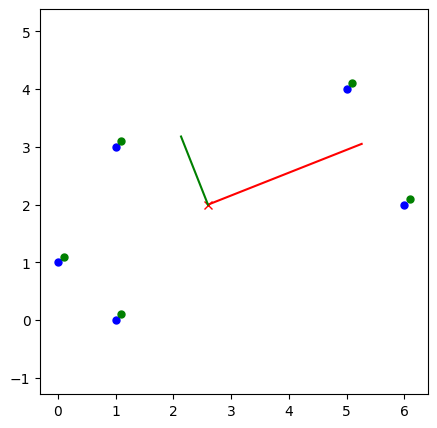

In [120]:
f = plt.figure(figsize=(5, 5))
f.add_subplot(1, 1, 1)
plt.axis('equal')
plt.plot(mi[0], mi[1], 'rx', markersize=6)
plt.plot(data[:,0], data[:,1], 'bo', markersize=5)
plt.plot(e1[:,0], e1[:,1], 'r-', markersize=5)
plt.plot(e2[:,0], e2[:,1], 'g-', markersize=5)

plt.plot(projectedData[:,0] + 0.1, projectedData[:,1] + 0.1, 'go', markersize=5)
# drawEllipse(mi, C, 1)

plt.show()